In [1]:
# students: s1234567, s2283619

# Python Programming - Pair Assignment

### This is your assignment notebook.

In this notebook you and your partner will write your pair assignment. Steps for submitting the assignment will be described on Learn.

### How to edit a notebook that has more than code: 

In this notebook you can see there are:

- **code cells** - in these you can edit and run python code
- **markdown cells** - basically text cells, like the one you are reading now. When you are done editing them, 'Run' them as you would run your python code to make them pretty. They use the 'Markdown' text formatting language, so eg. starting a line with # or ## will make it a header, and surroounding something with two asterixes ** will make it bold

Double-click this cell to see how you can edit a markdown cell and then Run it with Shift+Enter to see it 'interpreted' into headers and styled text. 

- To change a type of cell, use dropdown in the menu on top.
- remember to save your work frequently with usual keyboard shortcut, or File > Save & Checkpoint

small notes:

- please do not rename the notebook file.
- use **+** plus icon in the menu to add new cells



# Your Week 3 assignment task: 

### Formulate and answer a business question using a dataset and methods you've seen in the notebooks so far.

Pick one of the datasets we have used in the notebooks you have seen so far. In the notebooks you have looked at the datasets and were guided through one or two simple tasks for each. Look at the data - what type of questions can they answer?

The question does not need to be complicated. Your task is to use python to operate on data, find answer and support it with a graph or well-crafted table.


### Deliverable:

In your notebook please include all the code that you used to arrive at the conclusion. Also 

At the end of your notebook, you should provide:

- a markdown (text) cell with your mini-report (200 words +/- 10%). For reference, 'Marking criteria' section below has around 220 words)
- a cell which will generate the graph or table that accompanies your mini-report (you are allowed to combine number of graphs, if they are combined into one unit and make sense, eg. combining 3 bar charts side by side, or overlapping a line chart with a bar chart).




### Marks:

You will get points in university marking system for each of the below categories. 

0- 50% : Unsafisfactory

50-60% : Good

60-70% : Very Good

70% +  : Excellent
 
Your grade will be the average of your points in all categories. This assignment is worth 10% of your grade for this course. You and your partner will get the same grade. Only one of you should submit the assignment.

### Marking Criteria:

**A) Business Question and Answer:** Did you manage to find a question that can be answered with given data? As an analyst you will often have to dive into available data and identify how it ccan help the business, or solve a problem, withou first knowing what the problem is. Also can you formulate a clear answer to the question you created?

**B) Using the Data:** How well did you use the data to answer your question? Your answer should be supported by what you found in the data. Briefly describe why this was the correct data, and correct analysis to perform on it.

**C) Visualisation:** Can you aid your argument/aswer with visual clues? Graph can say a thousand words, but it is also easy to make one which is confusing, or misleading. Use simple (or highly customised) graphs to make your argument clearer.

**D) Code Quality:** Is your code clean, readable and DRY (Don't repeat yourself)? Are you using good readable variable names? Did you clean up your code and does it not include enay old/unused parts?

**E) Code Structure:** Is your code well structured and broken down? Just like good writing has sentences, paragraphs and chapters, good code should be split into sections. Breakdown your code into cells and functions. Use meaningful signposts (eg. comments, function names) to guide the reader through your code.


### Difficulty:

This assignment should not take you and your partner more than 1-2h. You can take one of the notebooks you liked working on and extract from it only the sections that helped you to address the question you decided on. There are not extra points for making the question DIFFICULT, but you are graded for CLEAN CODE and COMMUNICATING clearly.

# Some notes on how to edit a 'markdown' cell.

Change what type of a cell with a dropdown next to the run button

this is an example of 'Markdown' cell. You can use **all sorts** of styling in Markdown language. https://www.markdownguide.org/basic-syntax/

To edit cell, double-click it. To see how the result will look 'Run' this cell.

eg:

# header is created by adding # before the line

* bullet
* points

line:

---

`code sample`

# Your submission goes below:

In [2]:
# You can put your code here and below. Feel free to add more cells

## Table of Contents
- [1 - Background of the Analysis](#1)
- [2 - Packages](#2)
- [3 - Load and Process the Dataset](#3)
- [4 - Exploratory Analysis](#4)
- [5 - Prediction](#5)
- [6 - Results Analysis](#6)
- [7 - Minireport](#7)

<a name='1'></a>
## 1 - Background of the Analysis

It has been widely known and proved that breast cancer is one of the most common cancers among women worldwide, making it a significant and prevalent public health problem in today’s society. The early detection of breast cancer can significantly improve the prognosis and chance of survival, as it can promote timely clinical treatment to patients. Therefore, we are trying to figure out the correct classification of patients into malignant or benign groups in favour of the diagnosis of breast cancer. 

<a name='2'></a>
## 2 - Packages

Begin by importing all the packages you'll need during this assignment. 

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- [sklearn](https://scikit-learn.org/) is a free software machine learning library for the Python programming language.
- `np.random.seed(1)` is used to keep all the random function calls consistent. It helps grade your work - so please don't change it! 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets as ds
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import auc
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier

### added line to ensure plots are showing
%matplotlib inline 
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

<a name='3'></a>
## 3 - Load and Process the Dataset

We have chosen a dataset from sklearn called "breast_cancer" to detect the correlation between various variables and the target, which is whether the patient has breast cancer.


**Problem Statement**: Here is a dataset ("breast_cancer") containing:

    - the dataset provides us 569 observations and 30 observable variables to make predictions 
    
    - target labelled as malignant (1) or benign (0)
    
Let's get more familiar with the dataset. 

In [4]:
# Loading the dataset
dataset = ds.load_breast_cancer()
print(dataset.data.shape, dataset.target.shape)
target = dataset.target[:, None] # reshape 
df = pd.DataFrame(np.concatenate((dataset.data, target), axis = 1), columns = list(dataset['feature_names']) + ['target'])

(569, 30) (569,)


In [5]:
df.info() # checking the type of variables, all float, no categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Information about the dataset - Total 30 columns/features and no null entries

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.isna().sum().nlargest(5) # checking for NaN values

mean radius        0
mean texture       0
mean perimeter     0
mean area          0
mean smoothness    0
dtype: int64

<a name='4'></a>
##  4 - Exploratory Analysis

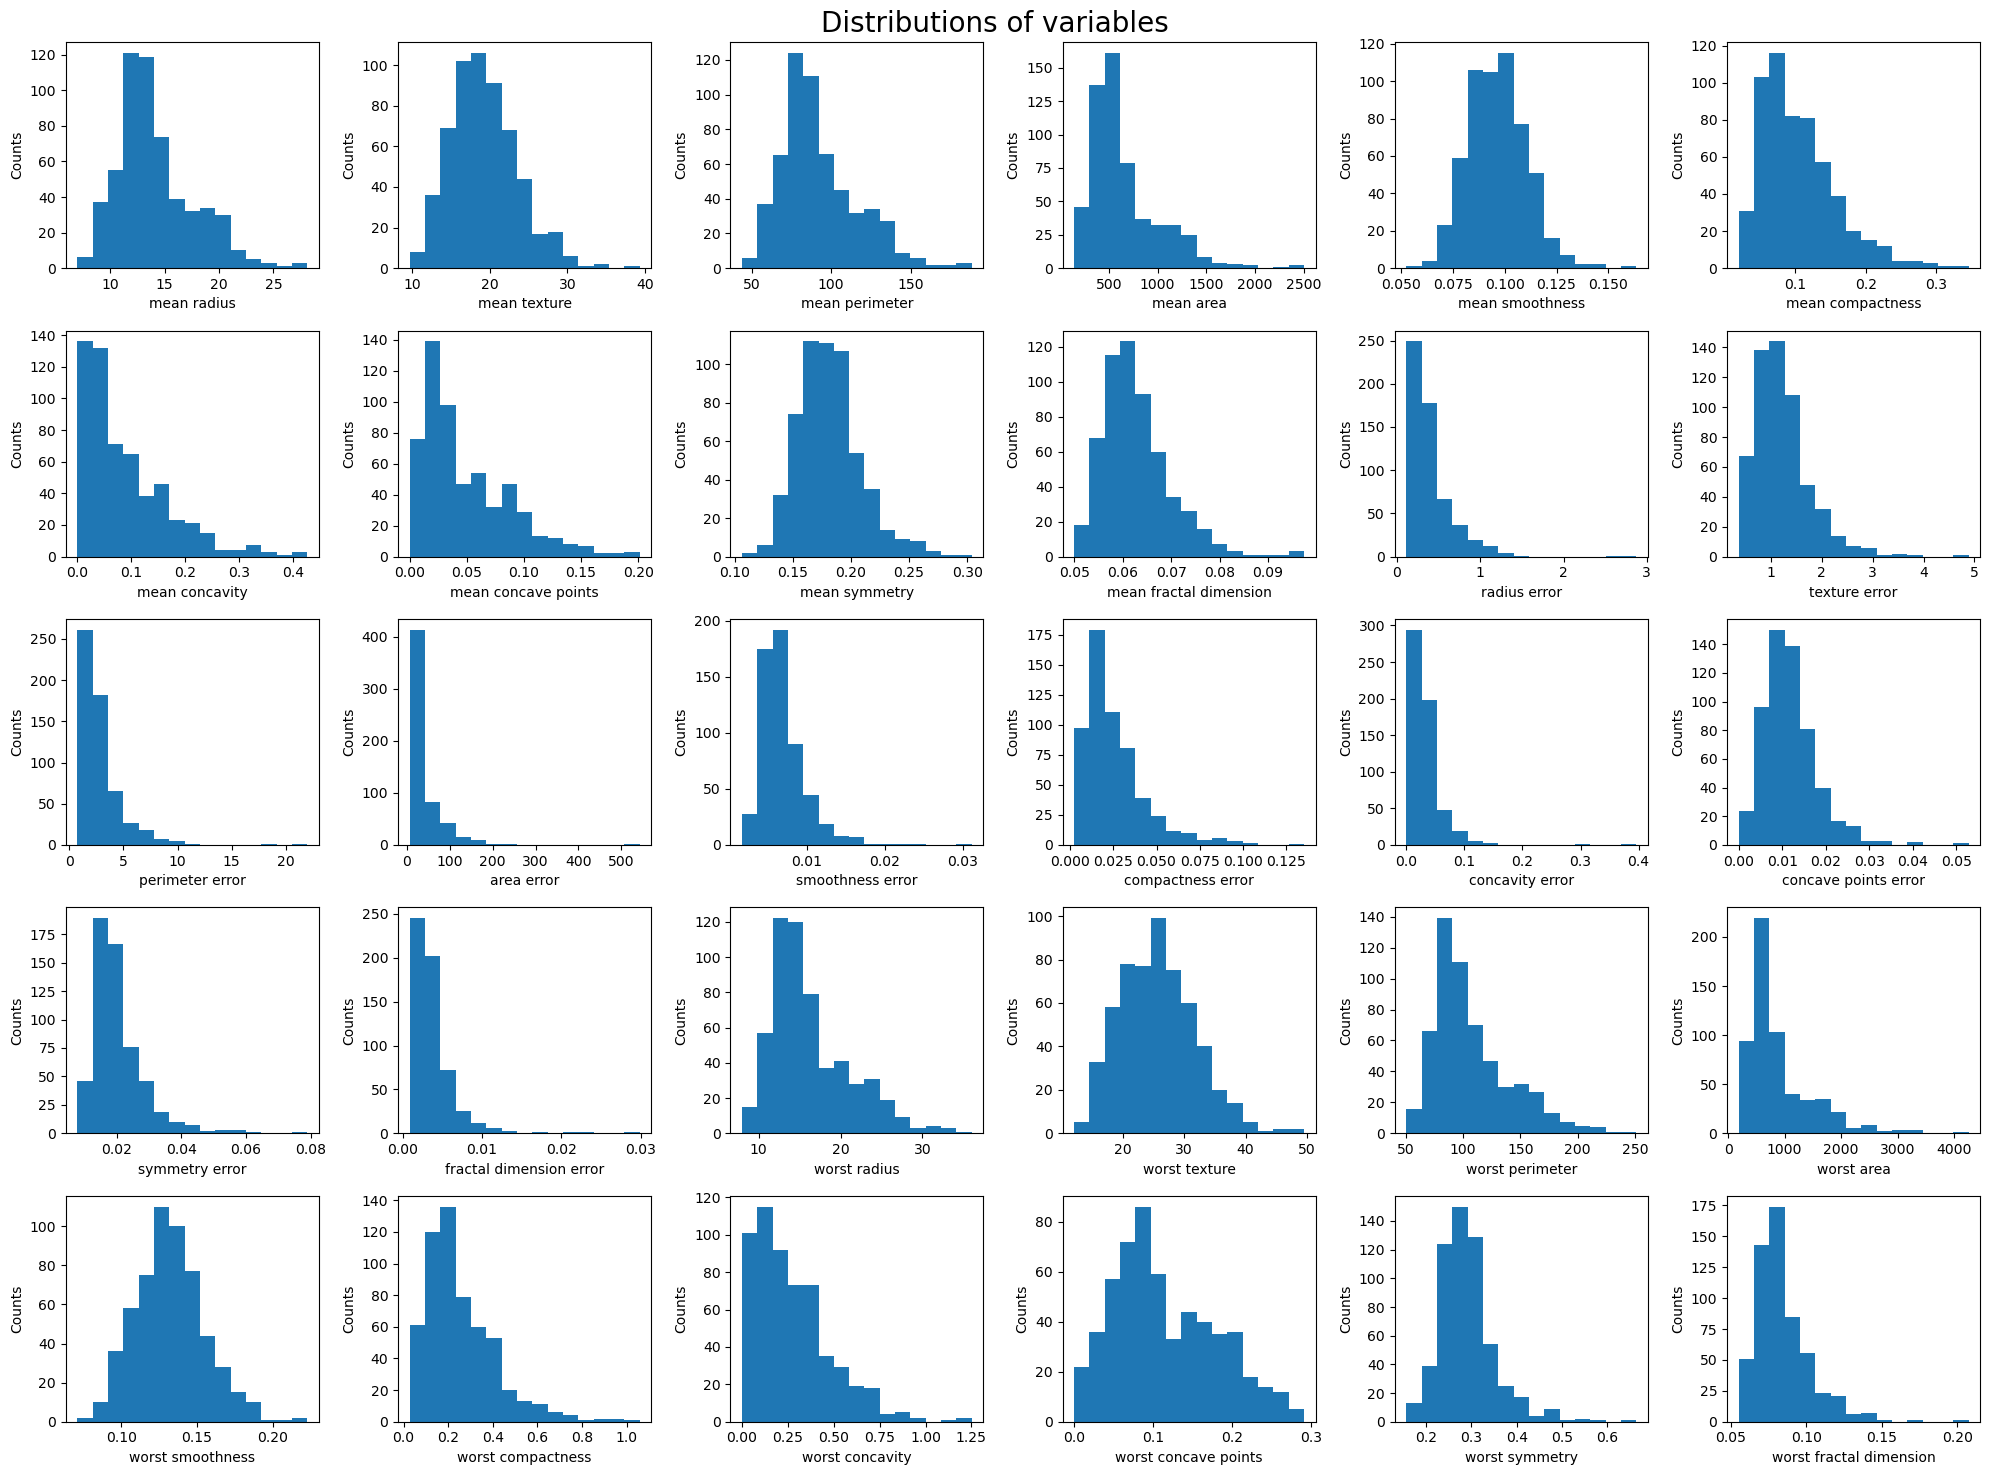

In [8]:
# Plotting the distributions of all vars
fig = plt.figure(figsize = (20,15), dpi = 100)
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(5,6,i + 1)
    plt.hist(df[column].values, bins = 15)
    plt.xlabel(column)
    plt.ylabel('Counts')
fig.suptitle('Distributions of variables', fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
corr_matrix = df.corr() # obtain correlation matrix
corr_matrix.head(5) # display first few rows of the correlation matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


<AxesSubplot:>

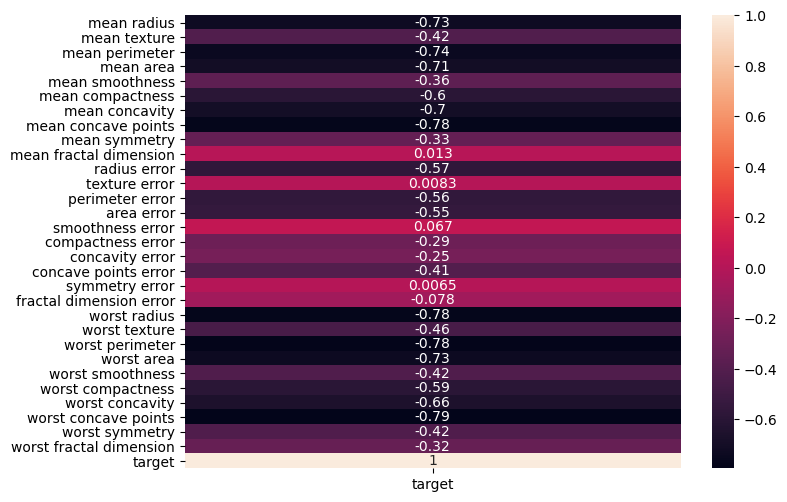

In [10]:
# Plotting correlations of variables with target heatmap
fig = plt.figure(figsize = (8,6), dpi = 100) 
sns.heatmap(corr_matrix[['target']], annot=True)

<a name='5'></a>
##  5 - Prediction

In [11]:
least_8_corr = corr_matrix['target'].apply(lambda x: abs(x)).sort_values(ascending = False).tail(8)
# Get less correlated values
least_8_corr

worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
Name: target, dtype: float64

In [12]:
to_drop = list(least_8_corr.index.values) + ['target']
to_drop

['worst fractal dimension',
 'compactness error',
 'concavity error',
 'fractal dimension error',
 'smoothness error',
 'mean fractal dimension',
 'texture error',
 'symmetry error',
 'target']

In [13]:
# Drop those less correlated variables
y = df['target'].values
X = df.drop(to_drop, axis = 1)

In [14]:
# Feature Scaling
scaler = MinMaxScaler()
X  = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.300625,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.253836,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.389847,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.353665,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.357075,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500


In [15]:
# Create a DecisionTreeClassifier object
classification = DecisionTreeClassifier()
# Select 300 samples, and then fit data
classification.fit(X[:300],y[:300])

# Calculate predicted values of 300 x values
prediction = classification.predict(X[300:])

This is training a model with 300 selected samples.

then we use remaining 269 samples to check if our model is good.

<a name='6'></a>
##  6 - Results Analysis

**Compute precision-recall pairs for different probability thresholds.**

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
> The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
> The recall is intuitively the ability of the classifier to find all the positive samples.

The last precision and recall values are 1 and 0 respectively and do not have a corresponding threshold.
*This ensures that the graph starts on the y axis.*

The first precision and recall values are precision=class balance and recall=1.0 which corresponds to a classifier that always predicts the positive class.

In [16]:
# Result evaluation
print("Recall: "+str(recall(y[300:],prediction)))
print("Precision: "+str(precision(y[300:],prediction)))
print("F1 score: "+str(f1(y[300:],prediction)))
print("Confusion matrix: \n"+str(cm(y[300:],prediction)))

Recall: 0.9014778325123153
Precision: 0.9786096256684492
F1 score: 0.9384615384615385
Confusion matrix: 
[[ 62   4]
 [ 20 183]]


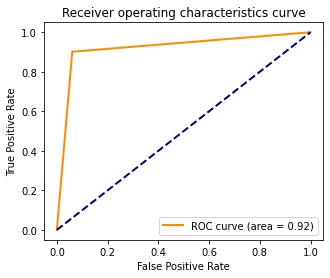

In [17]:
# Compute Receiver operating characteristic (ROC)
fpr, tpr, thresholds = roc(y[300:],  prediction)

# Compute Area Under the Curve (AUC) using the trapezoidal rule.
# This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score.
roc_auc = auc(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver operating characteristics curve')
plt.legend(loc="lower right")
plt.show()

<table> 
    <tr>
        <td> <b>AUC</b></td>
        <td> 0.92 </td>
    </tr>
</table>

In [18]:
# your graph could be generated here. Please make it very clear which graph is the part of your mini-report

<a name='7'></a>
##  7 - Minireport
### Your minireport can be here

It has been widely known and proved that breast cancer is one of the most common cancers among women worldwide. However, the early detection of breast cancer can significantly improve the prognosis and chance of survival, as it can promote timely clinical treatment to patients. Therefore, we are trying to figure out the correct classification of patients into malignant or benign groups in advance. 

In this notebook, we have carried out the following steps to analyse the “breast cancer” dataset:
1.	We have performed the necessary data cleaning to ensure that all data is valid and will not negatively affect the final model. 
2.	We have used pandas’ visualization which is built on top of matplotlib, to find the data distribution of the features and to check if there are any anomalous variables. 
3.	We have built a correlation matrix to detect any possible correlations between certain variables and the target of interest, and all less correlated features are dropped to reduce the complexity of the model. 
4.	We have adopted an effective and widely used method (Decision Tree) to classify data. Furthermore, we have checked the overall performing results by ROC.

In conclusion, the basic model we built back then had `93%` test accuracy on predict whether the patient has breast cancer, which is generally satisfactory.